# Mid-term exam NLP


## Nguyen Van Quan


### 20010748

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.model_selection import train_test_split
import os

#### **Preprocessing**

In [2]:
%cd /content/drive/MyDrive/University/Term8/NLP/Mid-term/Mid-term

/content/drive/MyDrive/University/Term8/NLP/Mid-term/Mid-term


In [3]:
os.listdir()

['kaggle', 'Mid-term-sentiment140.ipynb', 'Mid-term-imdb-50000-reviews.ipynb']

IMDB Dataset of 50K Movie Reviews

Read the dataset

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv('kaggle/input/IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
len_ = 5000

In [7]:
df = df.sample(len_,random_state=12)

##### 1. LOWER CASING

In [8]:
df['review']=df['review'].str.lower()
df['review']

34622    it's hard to tell if noonan and marshall are t...
1163     well, where do i start...<br /><br />as one of...
7637     "my wife and kids," in my opinion, is an absol...
7045     what a surprise. a basic copycat of the comedy...
43847    josef von sternberg directs this magnificent s...
                               ...                        
35295    "kolchak: the night stalker" is a hugely enter...
32010    awesome movie! great combination of talents! i...
1902     an interesting movie with jordana brewster as ...
44943    this movie was a complete disaster for me. the...
801      the movie was gripping from start to finish an...
Name: review, Length: 5000, dtype: object

##### 2. REMOVE HTML TAGS:

In [9]:
#Removing HTML Tags
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'' ,text)
df['review']=df['review'].apply(remove_html_tags)

In [10]:
df['review']

34622    it's hard to tell if noonan and marshall are t...
1163     well, where do i start...as one of the other r...
7637     "my wife and kids," in my opinion, is an absol...
7045     what a surprise. a basic copycat of the comedy...
43847    josef von sternberg directs this magnificent s...
                               ...                        
35295    "kolchak: the night stalker" is a hugely enter...
32010    awesome movie! great combination of talents! i...
1902     an interesting movie with jordana brewster as ...
44943    this movie was a complete disaster for me. the...
801      the movie was gripping from start to finish an...
Name: review, Length: 5000, dtype: object

##### 3. REMOVE URLS:

In [11]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)
df['review']=df['review'].apply(remove_url)

In [12]:
df['review']

34622    it's hard to tell if noonan and marshall are t...
1163     well, where do i start...as one of the other r...
7637     "my wife and kids," in my opinion, is an absol...
7045     what a surprise. a basic copycat of the comedy...
43847    josef von sternberg directs this magnificent s...
                               ...                        
35295    "kolchak: the night stalker" is a hugely enter...
32010    awesome movie! great combination of talents! i...
1902     an interesting movie with jordana brewster as ...
44943    this movie was a complete disaster for me. the...
801      the movie was gripping from start to finish an...
Name: review, Length: 5000, dtype: object

##### 4. REMOVE PUNCTUATIONS

In [13]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))
df['review']=df['review'].apply(remove_punctuation)

In [14]:
df['review']

34622    its hard to tell if noonan and marshall are tr...
1163     well where do i startas one of the other revie...
7637     my wife and kids in my opinion is an absolute ...
7045     what a surprise a basic copycat of the comedy ...
43847    josef von sternberg directs this magnificent s...
                               ...                        
35295    kolchak the night stalker is a hugely entertai...
32010    awesome movie great combination of talents im ...
1902     an interesting movie with jordana brewster as ...
44943    this movie was a complete disaster for me ther...
801      the movie was gripping from start to finish an...
Name: review, Length: 5000, dtype: object

##### 5. CHAT WORD TREATMENT

In [15]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [16]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)
df['review']= df['review'].apply(chat_conversion)

In [17]:
df['review']

34622    its hard to tell if noonan and marshall are tr...
1163     well where do i startas one of the other revie...
7637     my wife and kids in my opinion is an absolute ...
7045     what a surprise a basic copycat of the comedy ...
43847    josef von sternberg directs this magnificent s...
                               ...                        
35295    kolchak the night stalker is a hugely entertai...
32010    awesome movie great combination of talents im ...
1902     an interesting movie with jordana brewster as ...
44943    this movie was a complete disaster for me ther...
801      the movie was gripping from start to finish an...
Name: review, Length: 5000, dtype: object

##### 6. REMOVING STOP WORDS

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def stopwords_removal(text):
    new_text=[]
    for word in text.split():
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)
df['review']= df['review'].apply(stopwords_removal)

In [20]:
df.head()

,review,sentiment
34622,hard tell noonan marshall trying ape abb...,negative
1163,well startas one reviewers said know yo...,positive
7637,wife kids opinion absolute abc classic ...,positive
7045,surprise basic copycat comedy classic nu...,positive
43847,josef von sternberg directs magnificent silen...,positive


##### 7. REMOVING EMOJIS

In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['review']= df['review'].apply(remove_emoji)

In [22]:
df.head()

,review,sentiment
34622,hard tell noonan marshall trying ape abb...,negative
1163,well startas one reviewers said know yo...,positive
7637,wife kids opinion absolute abc classic ...,positive
7045,surprise basic copycat comedy classic nu...,positive
43847,josef von sternberg directs magnificent silen...,positive


##### 8. STEMMING

In [23]:
from nltk. stem.porter import PorterStemmer
def stem_words(text):
    stemmer=PorterStemmer()
    return" ".join([stemmer.stem(word) for word in text.split()])
df['review']= df['review'].apply(remove_emoji)

In [24]:
df.head()

,review,sentiment
34622,hard tell noonan marshall trying ape abb...,negative
1163,well startas one reviewers said know yo...,positive
7637,wife kids opinion absolute abc classic ...,positive
7045,surprise basic copycat comedy classic nu...,positive
43847,josef von sternberg directs magnificent silen...,positive


In [25]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)

In [26]:
df.head()

,review,sentiment
34622,hard tell noonan marshall trying ape abb...,0
1163,well startas one reviewers said know yo...,1
7637,wife kids opinion absolute abc classic ...,1
7045,surprise basic copycat comedy classic nu...,1
43847,josef von sternberg directs magnificent silen...,1


##### Create train and test data

**Review text**

In [27]:
#train
norm_train_reviews=df.review[:int(0.8*len_)]
#test
norm_test_reviews=df.review[int(0.8*len_):]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature na

BOW_cv_train: (4000, 816041)
BOW_cv_test: (1000, 816041)


In [30]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (4000, 816041)
Tfidf_test: (1000, 816041)


**Labeling the sentiment text**

In [31]:
from sklearn.preprocessing import LabelBinarizer

In [32]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)
#Spliting the sentiment data
train_sentiments=sentiment_data[:int(0.8*len_)]
test_sentiments=sentiment_data[int(0.8*len_):]
print(train_sentiments)
print(test_sentiments)

(5000, 1)
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]

#### Model

##### Machine Learning Model

###### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

**Build Model and train**

In [34]:
#training the model
lr1=LogisticRegression(penalty='l2',max_iter=5000,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr1.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr2=LogisticRegression(penalty='l2',max_iter=5000,C=1,random_state=42)
lr_tfidf=lr2.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=5000, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=5000, random_state=42)


**Logistic regression model performane on test dataset**

In [35]:
#Predicting the model for bag of words
lr_bow_predict=lr1.predict(cv_test_reviews)
lr_bow_train = lr1.predict(cv_train_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr2.predict(tv_test_reviews)
lr_tfidf_train  =lr2.predict(tv_train_reviews)
print(lr_tfidf_predict)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

**Accuracy of the model**

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [37]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(train_sentiments,lr_bow_train)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(train_sentiments,lr_tfidf_train)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 1.0
lr_tfidf_score : 1.0


In [38]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.538
lr_tfidf_score : 0.573


**Print the classification report**

In [39]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.87      0.12      0.21       515
    Negative       0.51      0.98      0.67       485

    accuracy                           0.54      1000
   macro avg       0.69      0.55      0.44      1000
weighted avg       0.70      0.54      0.44      1000

              precision    recall  f1-score   support

    Positive       0.83      0.21      0.34       515
    Negative       0.53      0.95      0.68       485

    accuracy                           0.57      1000
   macro avg       0.68      0.58      0.51      1000
weighted avg       0.69      0.57      0.51      1000



**Confusion matrix**

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix BOW')

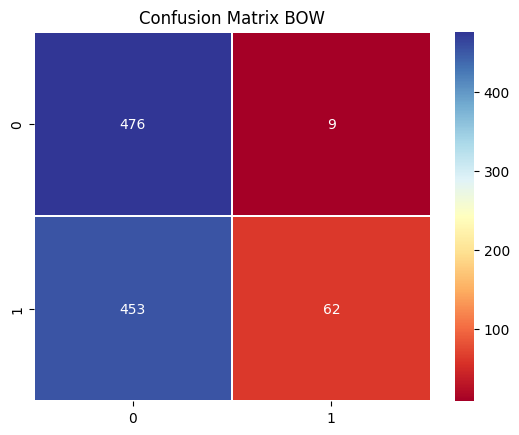

In [41]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
sns.heatmap(cm_bow,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix BOW")

Text(0.5, 1.0, 'Confusion Matrix TFIDF')

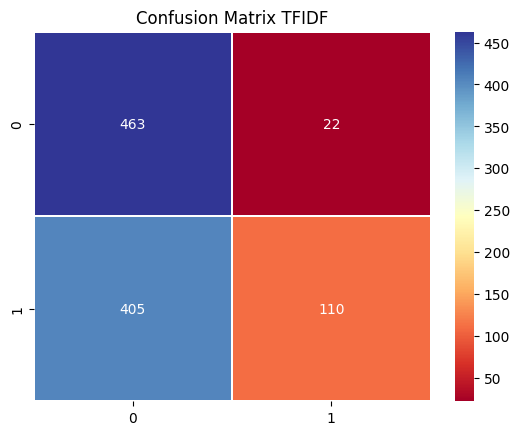

In [42]:
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
sns.heatmap(cm_tfidf,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix TFIDF")

###### Stochastic gradient descent

 **Stochastic gradient descent for bag of words and tfidf features**

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
#training the linear svm
sgd1=SGDClassifier(loss='hinge',max_iter=5000,random_state=12)
#fitting the sgd for bag of words
sgd_bow=sgd1.fit(cv_train_reviews,train_sentiments)
print(sgd_bow)
#fitting the sgd for tfidf features
sgd2=SGDClassifier(loss='hinge',max_iter=5000,random_state=42)
sgd_tfidf=sgd2.fit(tv_train_reviews,train_sentiments)
print(sgd_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=5000, random_state=12)
SGDClassifier(max_iter=5000, random_state=42)


**Model performance on test data**

In [45]:
#Predicting the model for bag of words
sgd_bow_predict=sgd_bow.predict(cv_test_reviews)
sgd_bow_train = sgd_bow.predict(cv_train_reviews)
print(sgd_bow_predict)
#Predicting the model for tfidf features
sgd_tfidf_predict=sgd_tfidf.predict(tv_test_reviews)
sgd_tfidf_train = sgd_tfidf.predict(tv_train_reviews)
print(sgd_tfidf_predict)

[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 

**Accuracy of the model**

In [46]:
#Accuracy score for bag of words
sgd_bow_score=accuracy_score(train_sentiments,sgd_bow_train)
print("sgd_bow_score :",sgd_bow_score)
#Accuracy score for tfidf features
sgd_tfidf_score=accuracy_score(train_sentiments,sgd_tfidf_train)
print("sgd_tfidf_score :",sgd_tfidf_score)

sgd_bow_score : 1.0
sgd_tfidf_score : 1.0


In [47]:
#Accuracy score for bag of words
sgd_bow_score=accuracy_score(test_sentiments,sgd_bow_predict)
print("sgd_bow_score :",sgd_bow_score)
#Accuracy score for tfidf features
sgd_tfidf_score=accuracy_score(test_sentiments,sgd_tfidf_predict)
print("sgd_tfidf_score :",sgd_tfidf_score)

sgd_bow_score : 0.624
sgd_tfidf_score : 0.67


**Print the classification report**

In [49]:
#Classification report for bag of words
sgd_bow_report=classification_report(test_sentiments,sgd_bow_predict,target_names=['Positive','Negative'])
print(sgd_bow_report)
#Classification report for tfidf features
sgd_tfidf_report=classification_report(test_sentiments,sgd_tfidf_predict,target_names=['Positive','Negative'])
print(sgd_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.80      0.36      0.50       515
    Negative       0.57      0.90      0.70       485

    accuracy                           0.62      1000
   macro avg       0.68      0.63      0.60      1000
weighted avg       0.69      0.62      0.60      1000

              precision    recall  f1-score   support

    Positive       0.74      0.56      0.64       515
    Negative       0.63      0.79      0.70       485

    accuracy                           0.67      1000
   macro avg       0.68      0.67      0.67      1000
weighted avg       0.68      0.67      0.67      1000



**Plot the confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix BOW')

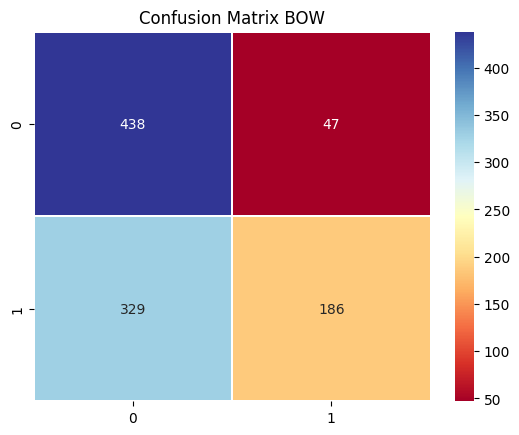

In [51]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,sgd_bow_predict,labels=[1,0])
sns.heatmap(cm_bow,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix BOW")

Text(0.5, 1.0, 'Confusion Matrix TFIDF')

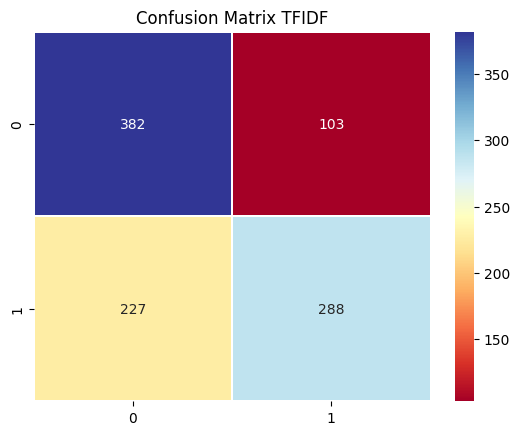

In [52]:
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,sgd_tfidf_predict,labels=[1,0])
sns.heatmap(cm_tfidf,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix TFIDF")

######Multinomial Naive Bayes

**Multinomial Naive Bayes for bag of words and tfidf features**

In [54]:
#training the model
mnb1=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb1.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb2=MultinomialNB()
mnb_tfidf=mnb2.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Model performance on test data**

In [55]:
#Predicting the model for bag of words
mnb_bow_predict =mnb_bow.predict(cv_test_reviews)
mnb_bow_train = mnb_bow.predict(cv_train_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb_tfidf.predict(tv_test_reviews)
mnb_tfidf_train = mnb_tfidf.predict(tv_train_reviews)
print(mnb_tfidf_predict)

[1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0
 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1
 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 

**Accuracy of the model**

In [56]:
# train data
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(train_sentiments,mnb_bow_train)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(train_sentiments,mnb_tfidf_train)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 1.0
mnb_tfidf_score : 1.0


In [57]:
# test data
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.703
mnb_tfidf_score : 0.667


**Print the classification report**

In [58]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.72      0.70      0.71       515
    Negative       0.69      0.71      0.70       485

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000

              precision    recall  f1-score   support

    Positive       0.79      0.48      0.60       515
    Negative       0.61      0.86      0.72       485

    accuracy                           0.67      1000
   macro avg       0.70      0.67      0.66      1000
weighted avg       0.70      0.67      0.66      1000



**Plot the confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix BOW')

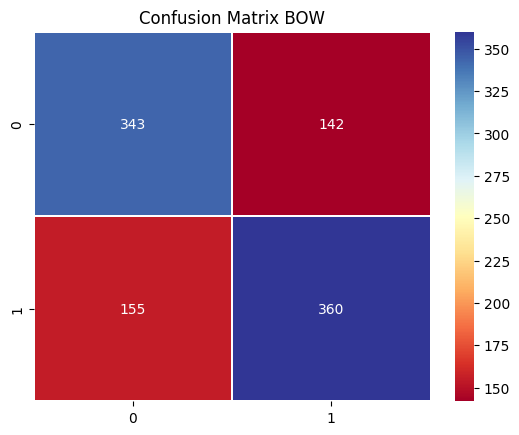

In [59]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
sns.heatmap(cm_bow,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix BOW")

Text(0.5, 1.0, 'Confusion Matrix TFIDF')

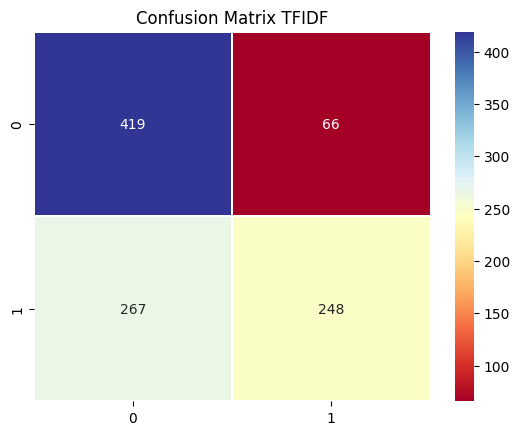

In [60]:
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
sns.heatmap(cm_tfidf,cmap="RdYlBu",annot=True,fmt='',linewidths=0.3)
plt.title("Confusion Matrix TFIDF")

#####Deep Learning Model

###### LSTM Model

In [61]:
from keras.layers import Dense, LSTM, Embedding

In [62]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X)
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=12)

In [63]:
# build LSTM model
# Xây dựng mô hình LSTM
LSTM_model = Sequential()
LSTM_model.add(Embedding(10000, 128))
LSTM_model.add(LSTM(128))
LSTM_model.add(Dense(1, activation='sigmoid'))

In [64]:
# trainning with BOW vector
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
LSTM_model_history = LSTM_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 19s 152ms/step - loss: 0.5959 - accuracy: 0.7081 - val_loss: 0.4699 - val_accuracy: 0.7738
Epoch 2/20
100/100 [==============================] - 13s 132ms/step - loss: 0.2232 - accuracy: 0.9187 - val_loss: 0.4656 - val_accuracy: 0.7825
Epoch 3/20
100/100 [==============================] - 11s 114ms/step - loss: 0.0619 - accuracy: 0.9834 - val_loss: 0.5471 - val_accuracy: 0.8150
Epoch 4/20
100/100 [==============================] - 12s 120ms/step - loss: 0.0187 - accuracy: 0.9956 - val_loss: 0.6958 - val_accuracy: 0.8200
Epoch 5/20
100/100 [==============================] - 8s 79ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.9649 - val_accuracy: 0.7812
Epoch 6/20
100/100 [==============================] - 10s 102ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 1.0027 - val_accuracy: 0.8200
Epoch 7/20
100/100 [==============================] - 8s 83ms/step - loss: 5.7756e-04 - accuracy: 1.0000 - val_loss: 1.1124 - val_ac

In [65]:
LSTM_score = LSTM_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", LSTM_score[1])

32/32 [==============================] - 1s 19ms/step - loss: 1.2999 - accuracy: 0.8220
Test Accuracy: 0.8220000267028809


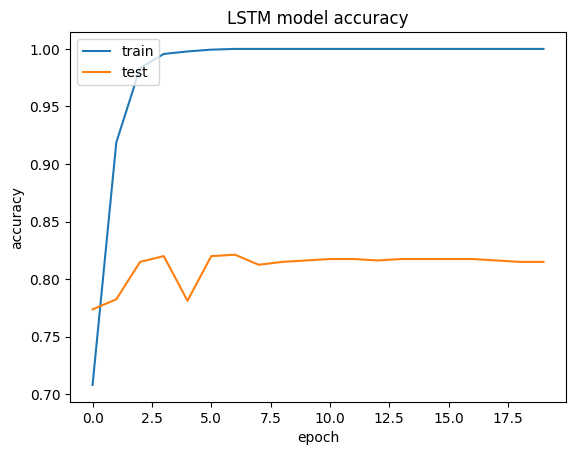

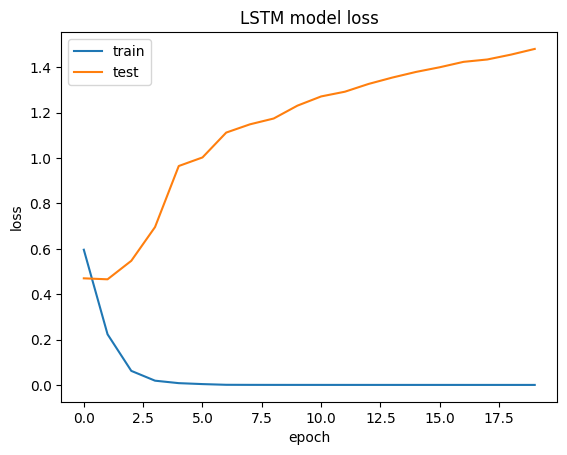

In [66]:
plt.plot(LSTM_model_history.history['accuracy'])
plt.plot(LSTM_model_history.history['val_accuracy'])

plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(LSTM_model_history.history['loss'])
plt.plot(LSTM_model_history.history['val_loss'])

plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##### Resnet Model

In [67]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense

In [68]:
# Create a CNN model
# Create a CNN model
CNN_model = Sequential()
CNN_model.add(Embedding(5000, 128))
CNN_model.add(Conv1D(128, 5, activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Conv1D(128, 5, activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Dense(1, activation='sigmoid'))


In [69]:
# train
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
CNN_model_history = CNN_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 20s 140ms/step - loss: 0.6923 - accuracy: 0.4914 - val_loss: 0.6856 - val_accuracy: 0.5143
Epoch 2/20
100/100 [==============================] - 13s 131ms/step - loss: 0.6755 - accuracy: 0.5369 - val_loss: 0.6813 - val_accuracy: 0.5174
Epoch 3/20
100/100 [==============================] - 9s 92ms/step - loss: 0.6643 - accuracy: 0.5442 - val_loss: 0.6817 - val_accuracy: 0.5177
Epoch 4/20
100/100 [==============================] - 8s 78ms/step - loss: 0.6571 - accuracy: 0.5489 - val_loss: 0.6939 - val_accuracy: 0.5162
Epoch 5/20
100/100 [==============================] - 8s 78ms/step - loss: 0.6495 - accuracy: 0.5481 - val_loss: 0.6991 - val_accuracy: 0.5159
Epoch 6/20
100/100 [==============================] - 7s 74ms/step - loss: 0.6379 - accuracy: 0.5588 - val_loss: 0.7271 - val_accuracy: 0.5140
Epoch 7/20
100/100 [==============================] - 7s 65ms/step - loss: 0.6254 - accuracy: 0.5645 - val_loss: 0.7584 - val_accuracy: 0.

In [70]:
CNN_score = CNN_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", CNN_score[1])

32/32 [==============================] - 1s 16ms/step - loss: 1.0295 - accuracy: 0.5278
Test Accuracy: 0.5278217196464539


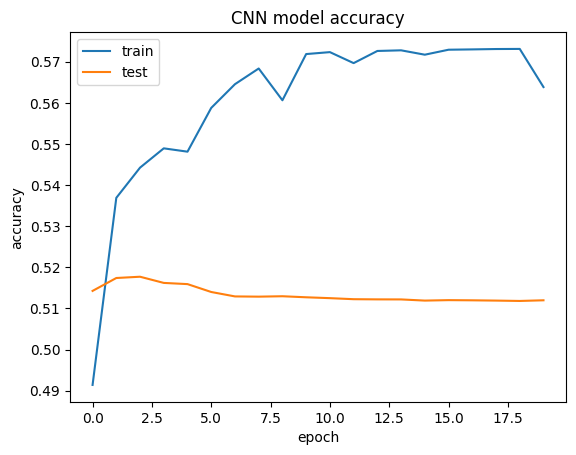

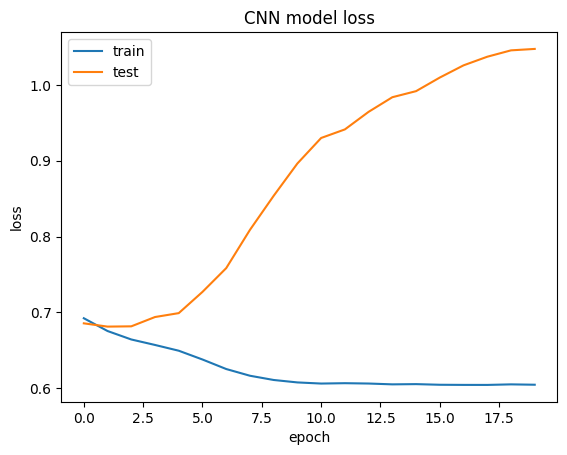

In [71]:
plt.plot(CNN_model_history.history['accuracy'])
plt.plot(CNN_model_history.history['val_accuracy'])

plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(CNN_model_history.history['loss'])
plt.plot(CNN_model_history.history['val_loss'])

plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()